In [1]:
import numpy as np
import matplotlib.pyplot as plt
from math import cos
from scipy.integrate import ode

In [2]:
def f(t, z, omega):
    #Right hand side of the differential equations
    #  dx/dt = y
    #  dy/dt = omega * x
    δ, α, β, γ, ω = omega                           #Parámetros de nuestra integral
    x, y = z                                    #Parámetros de integración
    f = [y, - δ*y - α*x - β*x**3 + γ*cos(ω*t)]  #Función a integrar

    return f

In [3]:
# Create an `ode` instance to solve the system of differential
# equations defined by `fun`, and set the solver method to 'dopri5' or "dopri5".
solver = ode(f)
solver.set_integrator('dopri5')

In [36]:
# Create the array `t` of time values at which to compute
# the solution, and create an array to hold the solution.
# Put the initial value in the solution array.
w1=[]
gf1=[]

t1 = 50
n = 350
for i in range(0,n):
    
    γ = 0.50
    α = -1.0        
    δ = 0.3
    ω = 1.2
    β = 1.0

    val = δ, α, β, γ, ω                      
    solver.set_f_params(val)

    # Create the array `t` of time values at which to compute
    # the solution, and create an array to hold the solution.
    # Put the initial value in the solution array.
    t0 = 0.0
    z0 = [1.0, 0]
    solver.set_initial_value(z0, t0)

    # Repeatedly call the `integrate` method to advance the
    # solution to time t[k], and save the solution in sol[k].

    t = np.linspace(t0, t1, n)
    sol = np.empty((n, 2))
    sol[0] = z0

    k = 1

    while solver.successful() and solver.t < t1:
        solver.integrate(t[k])
        sol[k] = solver.y
        k += 1

    x = sol[:,0]
    y = sol[:,1]

    w1.append(ω)
    gf1.append(max(abs(x)))

In [37]:
T=[]
for i in range (0,n):
    k = (t[i]) * (w1[i]) / (2* np.pi)
    
    T.append(k)

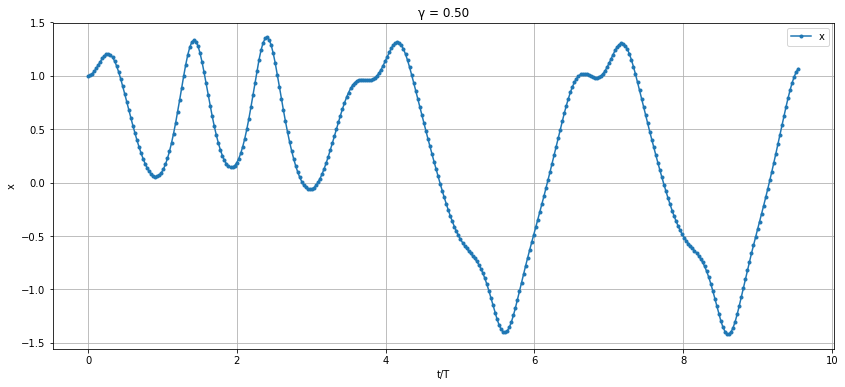

In [38]:
plt.figure(figsize=(14, 6))
plt.plot(T, sol[:,0], label='x', marker=".")
#plt.plot(t, sol[:,1], label='y')
plt.xlabel('t/T')
plt.ylabel('x')
plt.title("γ = 0.50")
plt.grid(True)
plt.legend()
plt.show()

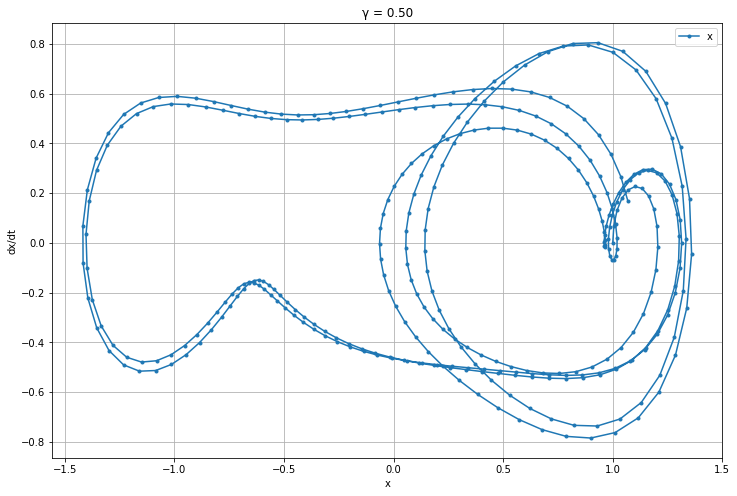

In [39]:
plt.figure(figsize=(12, 8))
plt.plot(sol[:,0], sol[:,1], label='x', marker=".")
#plt.plot(t, sol[:,1], label='y')
plt.xlabel('x')
plt.ylabel('dx/dt')
plt.title("γ = 0.50")
plt.grid(True)
plt.legend()
plt.show()